In [16]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [3]:
# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

In [10]:
print("Feature of Data [X]:")
print(iris.data[:5])

Feature of Data [X]:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [11]:
print("Target Value [y]:")
print(iris.target[:5])

Target Value [y]:
[0 0 0 0 0]


In [4]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
# Standardize the features using scikit-learn
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [6]:
# Build a simple neural network model with TensorFlow
model = Sequential()
model.add(Dense(8, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))


In [12]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [13]:
# Train the model
model.fit(X_train_scaled, y_train, epochs=50, batch_size=2, verbose=1)


Epoch 1/50
60/60 [==============================] - 1s 3ms/step - loss: 1.0372 - accuracy: 0.3500
Epoch 2/50
60/60 [==============================] - 0s 3ms/step - loss: 0.9148 - accuracy: 0.6333
Epoch 3/50
60/60 [==============================] - 0s 3ms/step - loss: 0.8149 - accuracy: 0.8000
Epoch 4/50
60/60 [==============================] - 0s 3ms/step - loss: 0.7268 - accuracy: 0.8500
Epoch 5/50
60/60 [==============================] - 0s 2ms/step - loss: 0.6452 - accuracy: 0.8083
Epoch 6/50
60/60 [==============================] - 0s 2ms/step - loss: 0.5747 - accuracy: 0.7833
Epoch 7/50
60/60 [==============================] - 0s 2ms/step - loss: 0.5195 - accuracy: 0.7917
Epoch 8/50
60/60 [==============================] - 0s 2ms/step - loss: 0.4782 - accuracy: 0.8000
Epoch 9/50
60/60 [==============================] - 0s 2ms/step - loss: 0.4462 - accuracy: 0.8250
Epoch 10/50
60/60 [==============================] - 0s 2ms/step - loss: 0.4211 - accuracy: 0.8167
Epoch 11/50
60/60 [

In [17]:
# Make predictions on the scaled test set
y_pred_prob = model.predict(X_test_scaled)
y_pred = np.argmax(y_pred_prob, axis=1)

1/1 [==============================] - 0s 22ms/step


In [18]:
# Use scikit-learn for evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Combined Model Accuracy: {accuracy}")

Combined Model Accuracy: 1.0


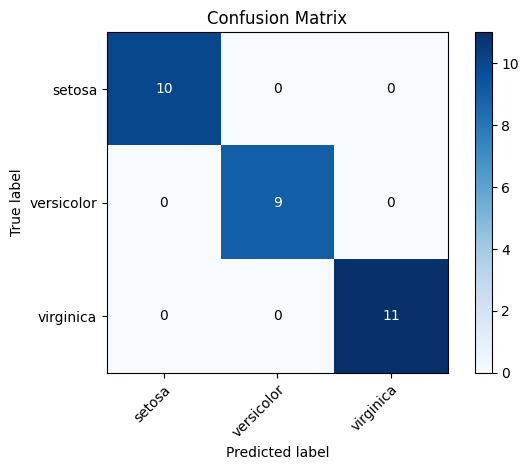

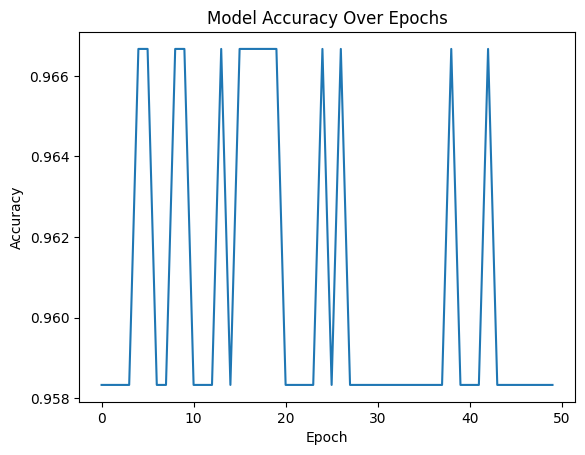

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, classes, cmap=plt.cm.Blues):
    cm = confusion_matrix(y_true, y_pred)
    classes = classes[unique_labels(y_true, y_pred)]
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels=classes, yticklabels=classes,
           title='Confusion Matrix',
           ylabel='True label',
           xlabel='Predicted label')

    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    fmt = 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

# Plot confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=iris.target_names)
plt.show()

# Plot accuracy over epochs
history = model.fit(X_train_scaled, y_train, epochs=50, batch_size=2, verbose=0)
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()


Certainly! Let's simplify the analysis:

### Confusion Matrix:

1. **Diagonal Elements:**
   - Higher values on the diagonal are good; they represent correct predictions.
   - Look for big numbers on the main diagonal.

2. **Off-diagonal Elements:**
   - These indicate misclassifications.
   - Check which classes are often confused with each other.

### Accuracy Plot:

1. **Increasing Line:**
   - A line going up means the model is learning and getting better.

2. **Fluctuations:**
   - If the line wiggles a lot, it might mean the model is struggling.

3. **Plateau or Going Down:**
   - If the line flattens or goes down, there might be issues.
   - It could be overfitting or the model needs more complexity.

### Overall:

- **Look for Patterns:**
  - Check if there are specific classes causing confusion.
  - Understand if the model is consistently improving or encountering problems.

- **Adjust if Needed:**
  - If things don't look good, consider adjusting how the model learns (learning rate, epochs) or the model itself (complexity).

- **Check Data:**
  - Ensure your data is prepared well. Maybe some features need more attention.

